In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
prescription_data = pd.read_csv('CMS Prescription Data.csv') 
HF_Drugs = pd.read_csv('HF Drugs.csv') 


In [66]:
Ordering_Physicians.head()

,Last Name,First Name,Tests Ordered,NPI,Facility,Location,Specialty
0,Yaranov,Dmitry,194,1255607164,Baptist Memorial,"Memphis, TN",Cardiology
1,Traufler,Robin,140,1669474490,Prisma Health Richland,"Columbia, SC",PAC
2,Droogan,Christopher,131,1174528129,Lankenau,"Wynnewood, PA",Cardiology
3,Sheikh,Fariha,116,1912225137,Queen's Medical Center,"Honolulu, HI",Surgery
4,Carry,Brendan,113,1376836395,Geisinger,"Danville, PA",Cardiology


In [9]:
prescription_data.head()

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,...,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes
0,1467457358,Tedder,Barry,Jonesboro,AR,5,Cardiology,S,Atorvastatin Calcium,Atorvastatin Calcium,...,64088,12885.56,286.0,NaN,1010.0,1797.0,11153.63,53832.0,NaN,235.0
1,1174528129,Droogan,Christopher,Wynnewood,PA,42,Advanced Heart Failure and Transplant Cardiology,S,Atorvastatin Calcium,Atorvastatin Calcium,...,45465,11297.47,162.0,NaN,524.0,1441.2,10810.08,43185.0,NaN,150.0
2,1467457358,Tedder,Barry,Jonesboro,AR,5,Cardiology,S,Ezetimibe,Ezetimibe,...,36899,33996.05,175.0,NaN,608.0,965.8,25509.17,28963.0,NaN,136.0
3,1174528129,Droogan,Christopher,Wynnewood,PA,42,Advanced Heart Failure and Transplant Cardiology,S,Metoprolol Succinate,Metoprolol Succinate,...,34834,15100.89,125.0,NaN,412.0,1120.0,14741.95,33544.0,#,NaN
4,1467457358,Tedder,Barry,Jonesboro,AR,5,Cardiology,S,Clopidogrel,Clopidogrel Bisulfate,...,33662,5357.32,148.0,NaN,568.0,958.2,4435.52,28681.0,NaN,123.0


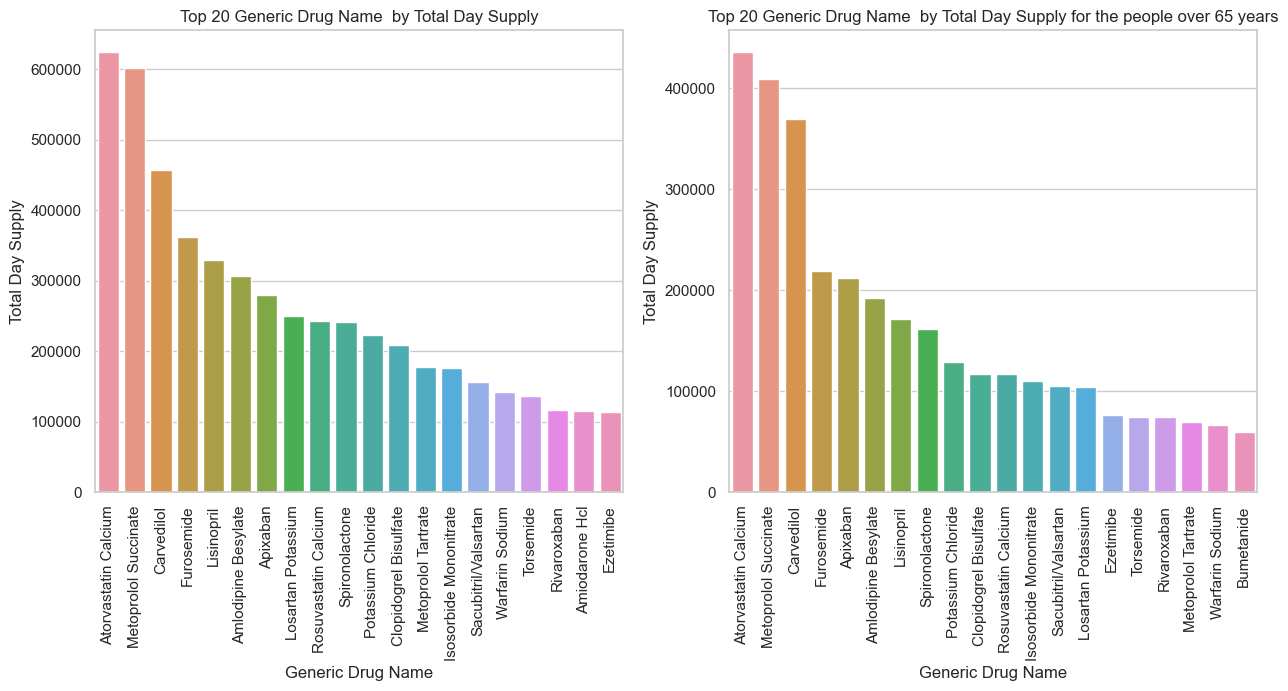

In [70]:
# Select only the relevant columns
prescription_temp = prescription_data[['Gnrc_Name', 'Tot_Day_Suply', 'GE65_Tot_Day_Suply']]


# Group the data by generic name and sum the values for each group
grouped = prescription_temp.groupby('Gnrc_Name').sum()
# Sort the groups by total day supply in descending order
sorted_groups = grouped.sort_values('Tot_Day_Suply', ascending=False)
top_20 = sorted_groups.head(20)

# Group the data by generic name and sum the values for each group
grouped_65 = prescription_temp.groupby('Gnrc_Name').sum()
# Sort the groups by total day supply in descending order
sorted_groups_65 = grouped_65.sort_values('GE65_Tot_Day_Suply', ascending=False)
# Select the top 10 generic drug names
top_20_65 = sorted_groups_65.head(20)


sns.set_style("whitegrid")

plt.figure(figsize=(15,6))# Set the chart title and labels

plt.subplot(1,2,1)
# Create the bar plot
sns.barplot(data=top_20, x=top_20.index, y='Tot_Day_Suply')
# Set the chart title and labels
plt.title('Top 20 Generic Drug Name  by Total Day Supply')
plt.xlabel('Generic Drug Name')
plt.ylabel('Total Day Supply')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

plt.subplot(1,2,2)
# Create the bar plot
sns.barplot(data=top_20_65, x=top_20_65.index, y='GE65_Tot_Day_Suply')

# Set the chart title and labels
plt.title('Top 20 Generic Drug Name  by Total Day Supply for the people over 65 years')
plt.xlabel('Generic Drug Name')
plt.ylabel('Total Day Supply')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the chart
plt.show()

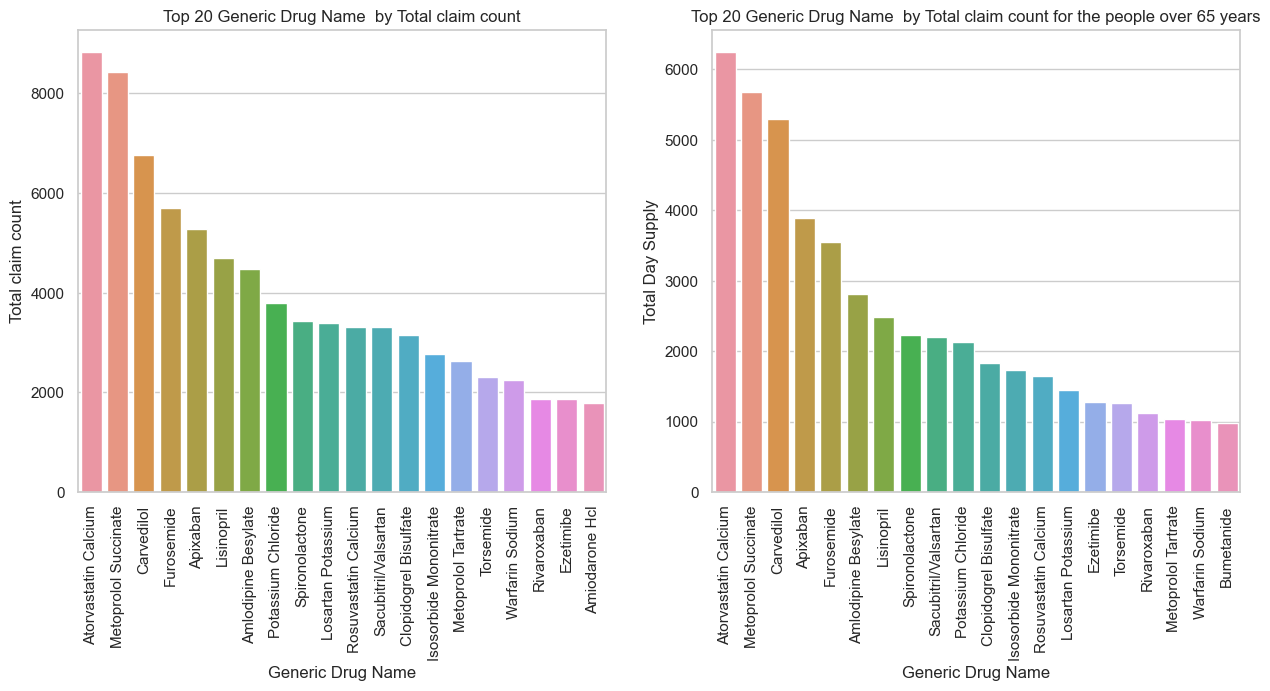

In [72]:
# Select only the relevant columns
prescription_temp = prescription_data[['Gnrc_Name', 'Tot_Clms', 'GE65_Tot_Clms']]


# Group the data by generic name and sum the values for each group
grouped = prescription_temp.groupby('Gnrc_Name').sum()
# Sort the groups by total day supply in descending order
sorted_groups = grouped.sort_values('Tot_Clms', ascending=False)
top_20 = sorted_groups.head(20)

# Group the data by generic name and sum the values for each group
grouped_65 = prescription_temp.groupby('Gnrc_Name').sum()
# Sort the groups by total day supply in descending order
sorted_groups_65 = grouped_65.sort_values('GE65_Tot_Clms', ascending=False)
# Select the top 10 generic drug names
top_20_65 = sorted_groups_65.head(20)


sns.set_style("whitegrid")

plt.figure(figsize=(15,6))# Set the chart title and labels

plt.subplot(1,2,1)
# Create the bar plot
sns.barplot(data=top_20, x=top_20.index, y='Tot_Clms')
# Set the chart title and labels
plt.title('Top 20 Generic Drug Name  by Total claim count')
plt.xlabel('Generic Drug Name')
plt.ylabel('Total claim count')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

plt.subplot(1,2,2)
# Create the bar plot
sns.barplot(data=top_20_65, x=top_20_65.index, y='GE65_Tot_Clms')

# Set the chart title and labels
plt.title('Top 20 Generic Drug Name  by Total claim count for the people over 65 years')
plt.xlabel('Generic Drug Name')
plt.ylabel('Total claim count')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the chart
plt.show()

In [84]:
prescription_data.loc[prescription_data['Gnrc_Name']=='Apixaban','GE65_Tot_Clms'].sum()

3889.0

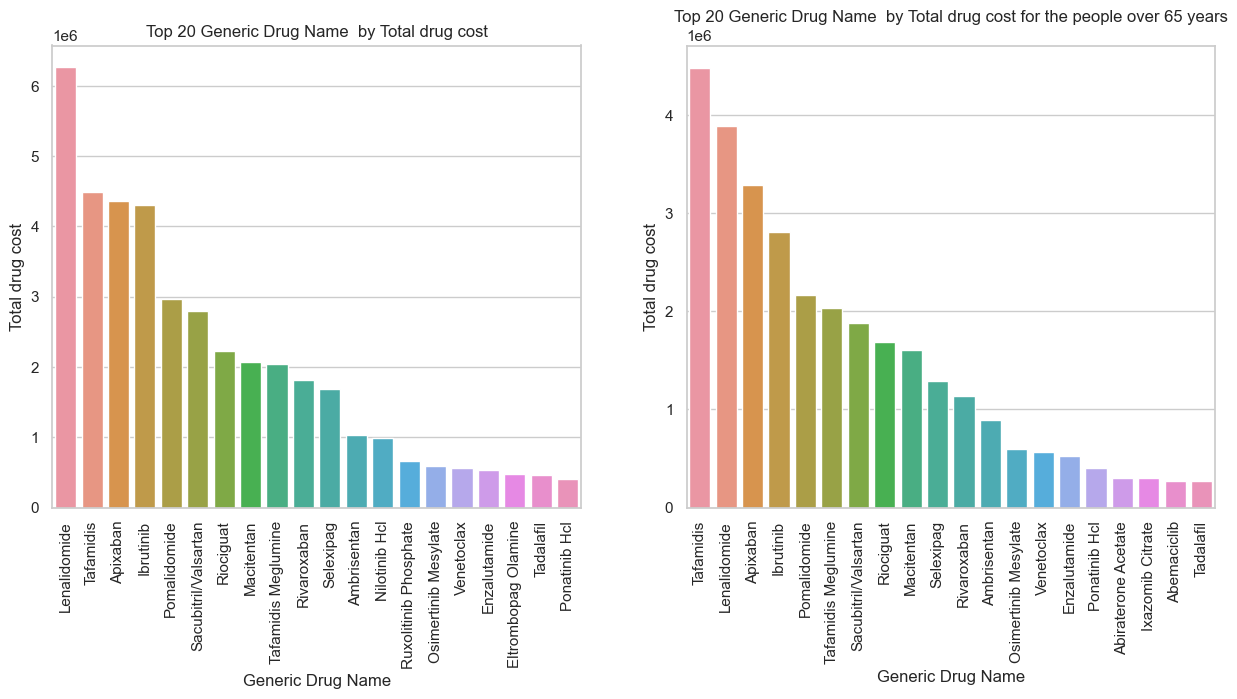

In [73]:
# Select only the relevant columns
prescription_temp = prescription_data[['Gnrc_Name', 'Tot_Drug_Cst', 'GE65_Tot_Drug_Cst']]


# Group the data by generic name and sum the values for each group
grouped = prescription_temp.groupby('Gnrc_Name').sum()
# Sort the groups by total day supply in descending order
sorted_groups = grouped.sort_values('Tot_Drug_Cst', ascending=False)
top_20 = sorted_groups.head(20)

# Group the data by generic name and sum the values for each group
grouped_65 = prescription_temp.groupby('Gnrc_Name').sum()
# Sort the groups by total day supply in descending order
sorted_groups_65 = grouped_65.sort_values('GE65_Tot_Drug_Cst', ascending=False)
# Select the top 10 generic drug names
top_20_65 = sorted_groups_65.head(20)


sns.set_style("whitegrid")

plt.figure(figsize=(15,6))# Set the chart title and labels

plt.subplot(1,2,1)
# Create the bar plot
sns.barplot(data=top_20, x=top_20.index, y='Tot_Drug_Cst')
# Set the chart title and labels
plt.title('Top 20 Generic Drug Name  by Total drug cost')
plt.xlabel('Generic Drug Name')
plt.ylabel('Total drug cost')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

plt.subplot(1,2,2)
# Create the bar plot
sns.barplot(data=top_20_65, x=top_20_65.index, y='GE65_Tot_Drug_Cst')

# Set the chart title and labels
plt.title('Top 20 Generic Drug Name  by Total drug cost for the people over 65 years')
plt.xlabel('Generic Drug Name')
plt.ylabel('Total drug cost')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the chart
plt.show()

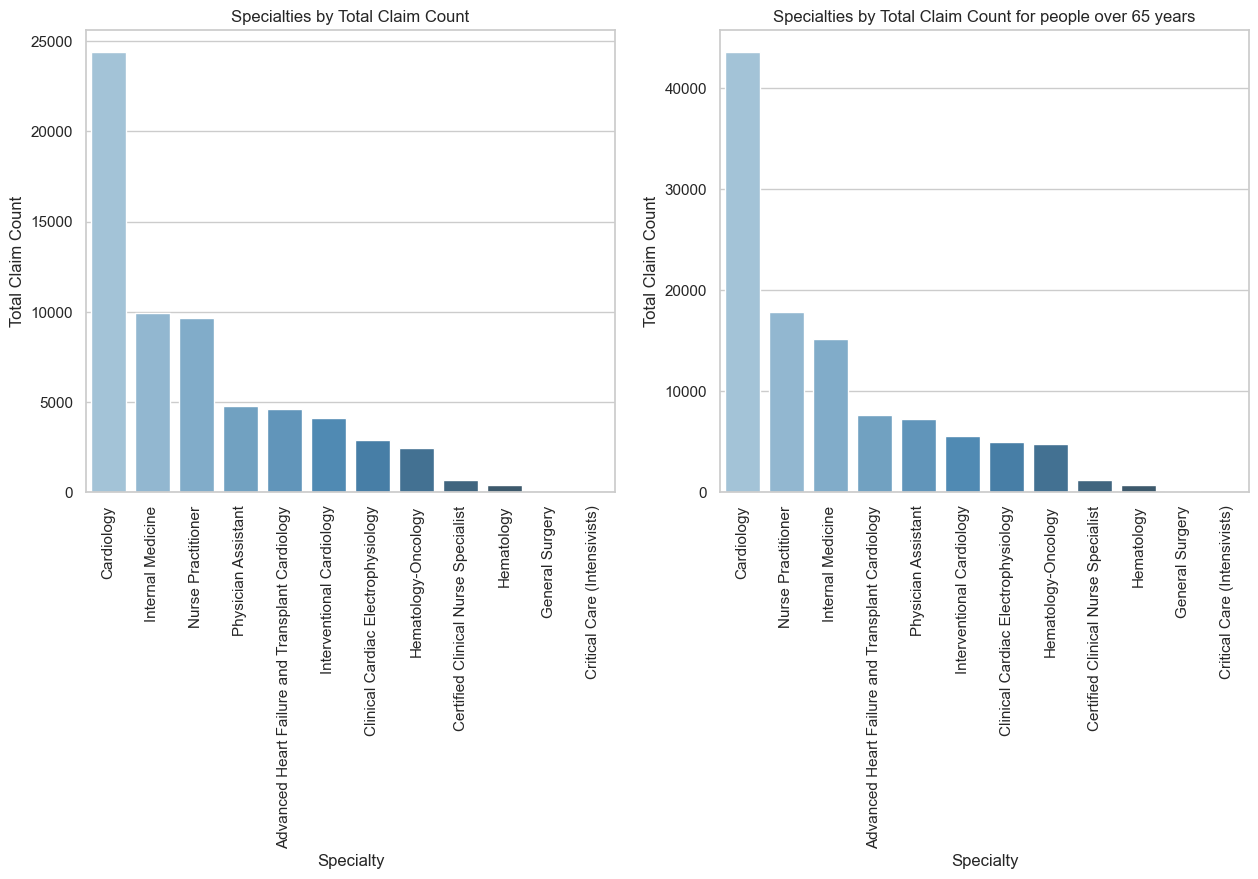

In [78]:
prescription_temp = prescription_data[['Prscrbr_Type', 'Tot_Clms', 'GE65_Tot_Clms']]



# Group the data by specialty and sum the total number of claims for each specialty
specialty_totals = prescription_temp.groupby('Prscrbr_Type')['Tot_Clms'].sum().reset_index()
# Sort the data in descending order by total_claim_count and take the  specialties
top_specialties = specialty_totals.sort_values('Tot_Clms', ascending=False)


# Group the data by specialty and sum the total number of claims for each specialty
specialty_totals_65 = prescription_temp.groupby('Prscrbr_Type')['GE65_Tot_Clms'].sum().reset_index()
# Sort the data in descending order by total_claim_count and take the specialties
top_specialties_65 = specialty_totals_65.sort_values('GE65_Tot_Clms', ascending=False)


sns.set_style("whitegrid")

plt.figure(figsize=(15,6))# Set the chart title and labels

plt.subplot(1,2,1)
# Create the bar plot
sns.barplot(x='Prscrbr_Type', y='GE65_Tot_Clms', data=top_specialties_65, palette='Blues_d')
# Set the chart title and labels
plt.xlabel('Specialty')
plt.ylabel('Total Claim Count')
plt.title('Specialties by Total Claim Count')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

plt.subplot(1,2,2)
# Create the bar plot
sns.barplot(x='Prscrbr_Type', y='Tot_Clms', data=top_specialties, palette='Blues_d')
# Set the chart title and labels
plt.xlabel('Specialty')
plt.ylabel('Total Claim Count')
plt.title('Specialties by Total Claim Count for people over 65 years')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the chart
plt.show()

In [11]:
prescription_data.columns

Index(['Prscrbr_NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name',
       'Prscrbr_City', 'Prscrbr_State_Abrvtn', 'Prscrbr_State_FIPS',
       'Prscrbr_Type', 'Prscrbr_Type_Src', 'Brnd_Name', 'Gnrc_Name',
       'Tot_Clms', 'Tot_30day_Fills', 'Tot_Day_Suply', 'Tot_Drug_Cst',
       'Tot_Benes', 'GE65_Sprsn_Flag', 'GE65_Tot_Clms', 'GE65_Tot_30day_Fills',
       'GE65_Tot_Drug_Cst', 'GE65_Tot_Day_Suply', 'GE65_Bene_Sprsn_Flag',
       'GE65_Tot_Benes'],
      dtype='object')

Text(0.5, 1.0, 'relation between Gnrc_Name , Prscrbr_City with respect to the total claims')

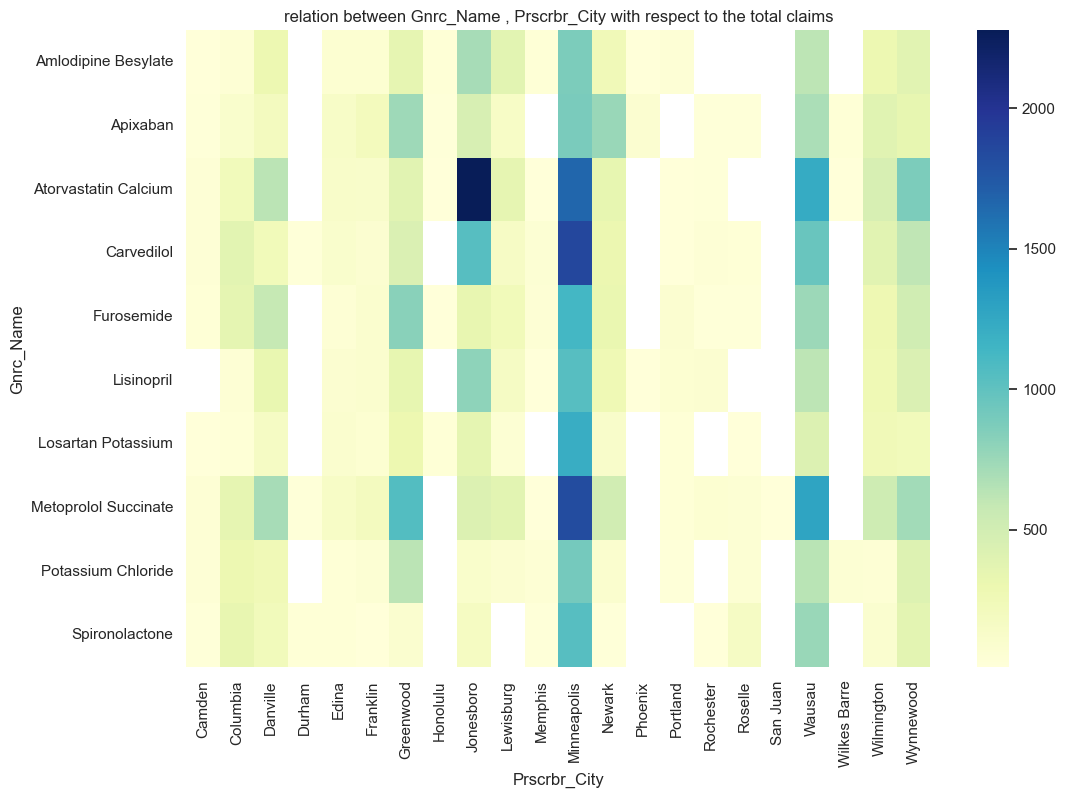

In [92]:
prescription_temp = prescription_data[['Prscrbr_City', 'Gnrc_Name', 'Tot_Clms']]


# Group the data by generic name and sum the total number of claims for each generic name
grouped_data = prescription_temp.groupby('Gnrc_Name')['Tot_Clms'].sum().reset_index()

# Sort the data by total claim count in descending order, and get the top 10 generic names
top_10_generics = grouped_data.sort_values('Tot_Clms', ascending=False).head(10)['Gnrc_Name'].tolist()

# Filter the data to only include rows with the top 10 generic names
filtered_data = prescription_temp[prescription_temp['Gnrc_Name'].isin(top_10_generics)]

# Group the filtered data by generic name and city, and sum the total number of claims for each combination
grouped_data = filtered_data.groupby(['Gnrc_Name', 'Prscrbr_City'])['Tot_Clms'].sum().reset_index()

# Pivot the data to create a matrix with generic name as rows, city as columns, and total claim count as values
pivoted_data = grouped_data.pivot(index='Gnrc_Name', columns='Prscrbr_City', values='Tot_Clms')

# Create a heatmap of the total claim count for each generic name and city
sns.heatmap(pivoted_data, cmap='YlGnBu')

plt.title('Relation between Prscrbr_City , top 10 Gnrc_Name with respect to the total claims')

In [18]:
prescription_data.columns

Index(['Prscrbr_NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name',
       'Prscrbr_City', 'Prscrbr_State_Abrvtn', 'Prscrbr_State_FIPS',
       'Prscrbr_Type', 'Prscrbr_Type_Src', 'Brnd_Name', 'Gnrc_Name',
       'Tot_Clms', 'Tot_30day_Fills', 'Tot_Day_Suply', 'Tot_Drug_Cst',
       'Tot_Benes', 'GE65_Sprsn_Flag', 'GE65_Tot_Clms', 'GE65_Tot_30day_Fills',
       'GE65_Tot_Drug_Cst', 'GE65_Tot_Day_Suply', 'GE65_Bene_Sprsn_Flag',
       'GE65_Tot_Benes'],
      dtype='object')

Text(0.5, 1.0, 'relation between Gnrc_Name , Prscrbr_State_Abrvtn with respect to the total claims')

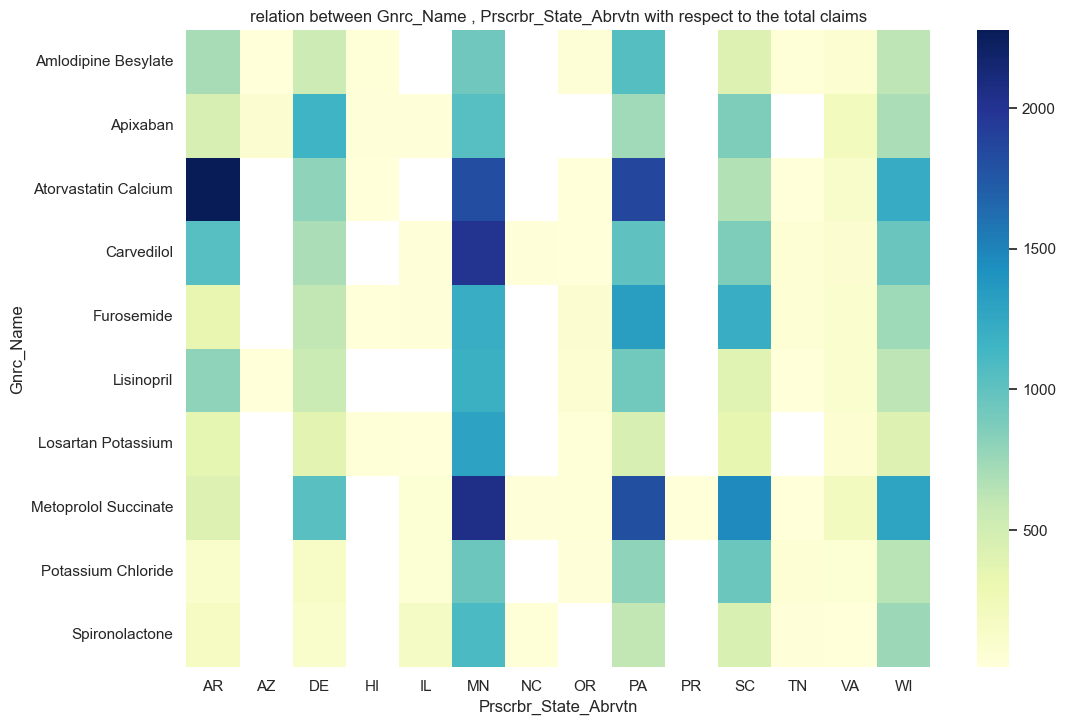

In [95]:
prescription_temp = prescription_data[['Prscrbr_State_Abrvtn', 'Gnrc_Name', 'Tot_Clms']]




# Group the data by generic name and sum the total number of claims for each generic name
grouped_data = prescription_temp.groupby('Gnrc_Name')['Tot_Clms'].sum().reset_index()

# Sort the data by total claim count in descending order, and get the top 10 generic names
top_10_generics = grouped_data.sort_values('Tot_Clms', ascending=False).head(10)['Gnrc_Name'].tolist()

# Filter the data to only include rows with the top 10 generic names
filtered_data = prescription_temp[prescription_temp['Gnrc_Name'].isin(top_10_generics)]

# Group the filtered data by generic name and city, and sum the total number of claims for each combination
grouped_data = filtered_data.groupby(['Gnrc_Name', 'Prscrbr_State_Abrvtn'])['Tot_Clms'].sum().reset_index()

# Pivot the data to create a matrix with generic name as rows, city as columns, and total claim count as values
pivoted_data = grouped_data.pivot(index='Gnrc_Name', columns='Prscrbr_State_Abrvtn', values='Tot_Clms')

# Create a heatmap of the total claim count for each generic name and city
sns.heatmap(pivoted_data, cmap='YlGnBu')

plt.title('Relation between Prscrbr_State_Abrvtn, top 10 Gnrc_Name with respect to the total claims')

<AxesSubplot: >

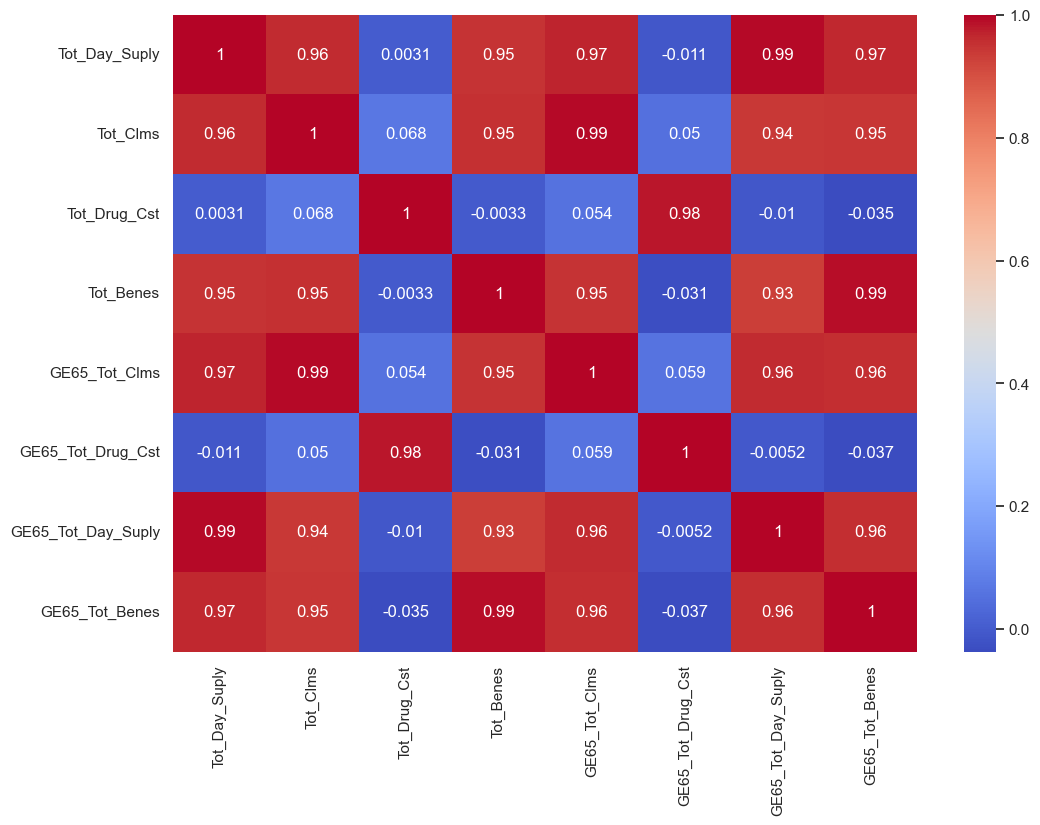

In [99]:
# Select relevant columns for correlation analysis
columns = ['Tot_Day_Suply', 'Tot_Clms', 'Tot_Drug_Cst', 'Tot_Benes','GE65_Sprsn_Flag', 'GE65_Tot_Clms',
           'GE65_Tot_Drug_Cst', 'GE65_Tot_Day_Suply',
       'GE65_Tot_Benes']
corr = prescription_data[columns].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)


# ordering physicians sheet

In [37]:

Ordering_Physicians_with_ID = pd.read_csv('Ordering Physicians with ID.csv') 

Ordering_Physicians = pd.read_csv('Ordering Physicians.csv') 

Ordering_Physicians['Specialty '] = Ordering_Physicians['Specialty '].str.strip()

In [38]:
Ordering_Physicians.head()

,Last Name,First Name,Tests Ordered,NPI,Facility,Location,Specialty
0,Yaranov,Dmitry,194,1255607164,Baptist Memorial,"Memphis, TN",Cardiology
1,Traufler,Robin,140,1669474490,Prisma Health Richland,"Columbia, SC",PAC
2,Droogan,Christopher,131,1174528129,Lankenau,"Wynnewood, PA",Cardiology
3,Sheikh,Fariha,116,1912225137,Queen's Medical Center,"Honolulu, HI",Surgery
4,Carry,Brendan,113,1376836395,Geisinger,"Danville, PA",Cardiology


<AxesSubplot: xlabel='Tests Ordered', ylabel='Full_name'>

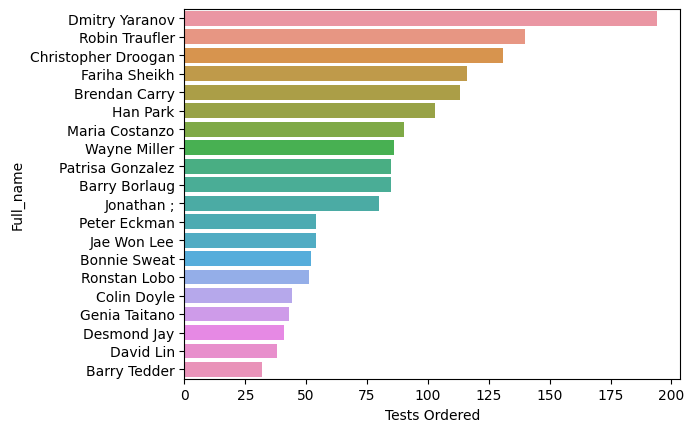

In [17]:

# Sort physicians by test order count
physician_data_sorted = Ordering_Physicians.sort_values(by='Tests Ordered', ascending=False)
physician_data_sorted['Full_name'] = physician_data_sorted['First Name'] + physician_data_sorted['Last Name']
# Plot top 10 physicians by test order count
sns.barplot(x='Tests Ordered', y='Full_name', data=physician_data_sorted.head(20))
plt.title('Test ordered by physicians')


<AxesSubplot: xlabel='Tests Ordered', ylabel='Facility'>

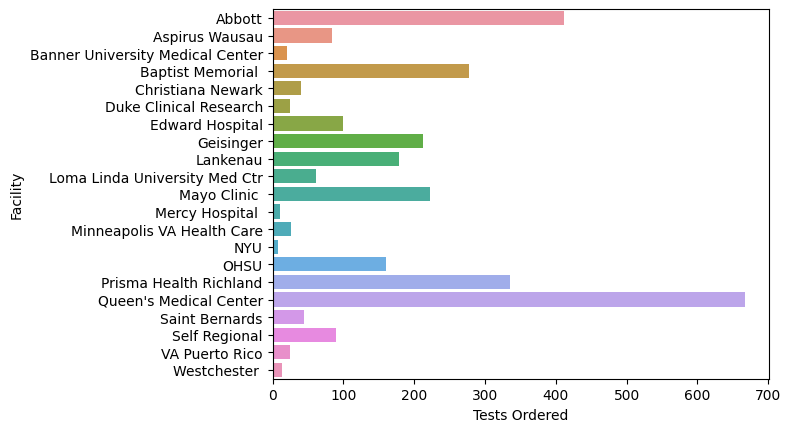

In [15]:
grouped_data = Ordering_Physicians.groupby('Facility')['Tests Ordered'].sum().reset_index()

sns.barplot(x='Tests Ordered', y='Facility', data=grouped_data)

<AxesSubplot: xlabel='Tests Ordered', ylabel='Specialty '>

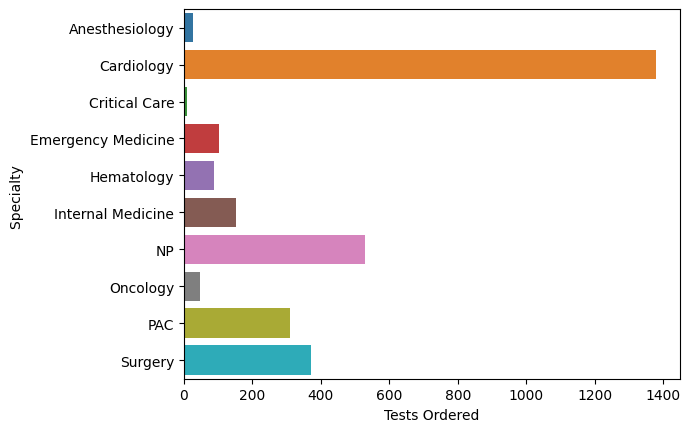

In [40]:
grouped_data = Ordering_Physicians.groupby('Specialty ')['Tests Ordered'].sum().reset_index()

sns.barplot(x='Tests Ordered', y='Specialty ', data=grouped_data)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Memphis, TN'),
  Text(1, 0, 'Columbia, SC'),
  Text(2, 0, 'Wynnewood, PA'),
  Text(3, 0, 'Honolulu, HI'),
  Text(4, 0, 'Danville, PA'),
  Text(5, 0, 'Naperville, IL'),
  Text(6, 0, 'Rochester, MN'),
  Text(7, 0, 'Minneapolis, MN'),
  Text(8, 0, 'Jonesboro, AR'),
  Text(9, 0, 'Loma Linda, CA '),
  Text(10, 0, 'Greenwood, SC'),
  Text(11, 0, 'Portland, OR'),
  Text(12, 0, 'Durham, NC'),
  Text(13, 0, 'Wausau, WI'),
  Text(14, 0, 'Phoenix, AZ'),
  Text(15, 0, 'Valhalla, NY'),
  Text(16, 0, 'San Juan, PR'),
  Text(17, 0, 'Newark, DE'),
  Text(18, 0, 'Coon Rapids, MN'),
  Text(19, 0, 'New York, NY')])

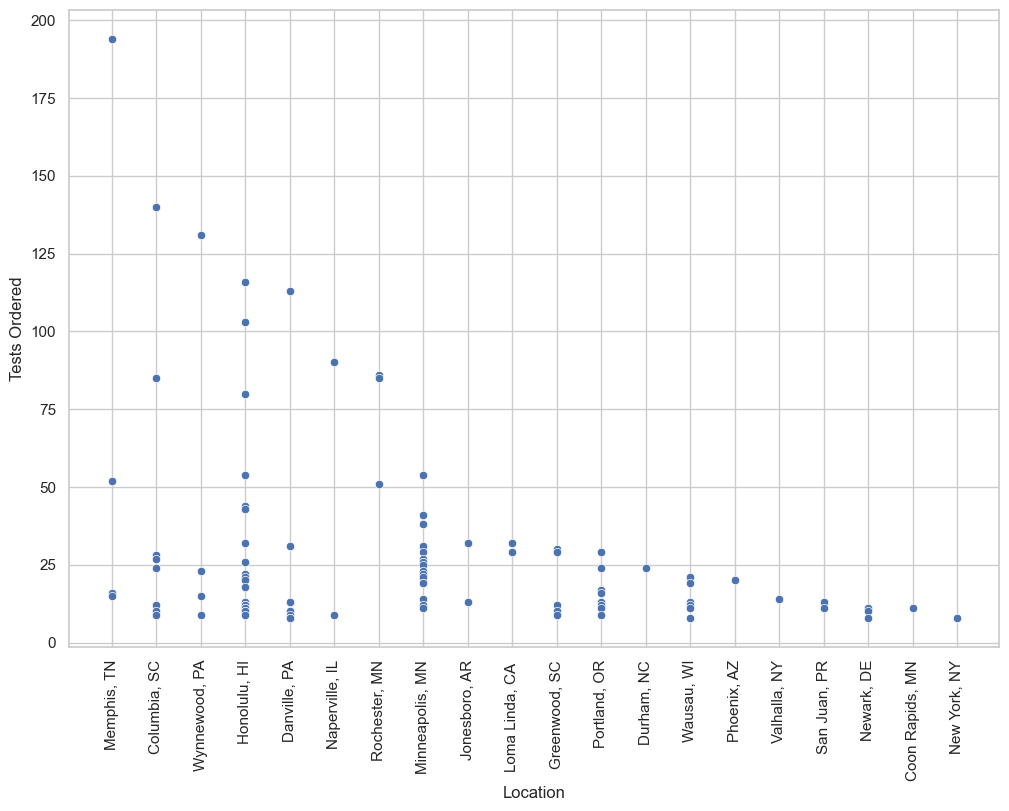

In [107]:
sns.scatterplot(x='Location', y='Tests Ordered', data=Ordering_Physicians)
plt.xticks(rotation=90)


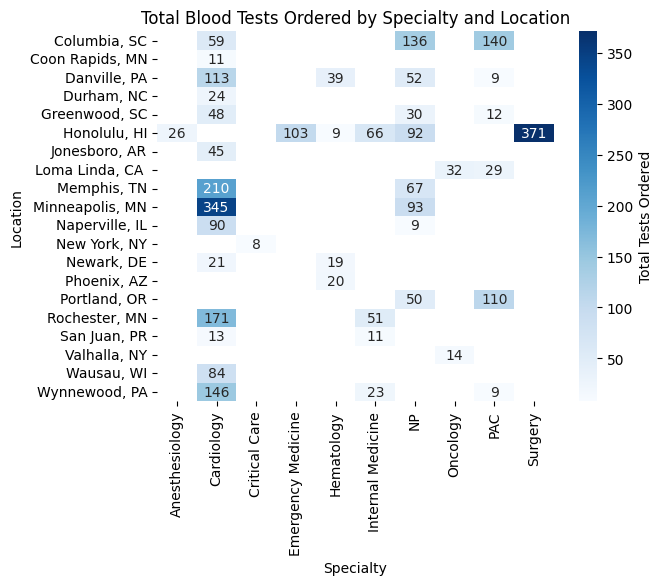

In [41]:

# create a pivot table with Location as rows, Specialty as columns, and Tests Ordered as values
pivot = Ordering_Physicians.pivot_table(index='Location', columns='Specialty ', values='Tests Ordered', aggfunc='sum')

# create heatmap
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='.0f', cbar_kws={'label': 'Total Tests Ordered'})

# set plot title and labels
plt.title('Total Blood Tests Ordered by Specialty and Location')
plt.xlabel('Specialty')
plt.ylabel('Location')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Memphis, TN'),
  Text(1, 0, 'Columbia, SC'),
  Text(2, 0, 'Wynnewood, PA'),
  Text(3, 0, 'Honolulu, HI'),
  Text(4, 0, 'Danville, PA'),
  Text(5, 0, 'Naperville, IL'),
  Text(6, 0, 'Rochester, MN'),
  Text(7, 0, 'Minneapolis, MN'),
  Text(8, 0, 'Jonesboro, AR'),
  Text(9, 0, 'Loma Linda, CA '),
  Text(10, 0, 'Greenwood, SC'),
  Text(11, 0, 'Portland, OR'),
  Text(12, 0, 'Durham, NC'),
  Text(13, 0, 'Wausau, WI'),
  Text(14, 0, 'Phoenix, AZ'),
  Text(15, 0, 'Valhalla, NY'),
  Text(16, 0, 'San Juan, PR'),
  Text(17, 0, 'Newark, DE'),
  Text(18, 0, 'Coon Rapids, MN'),
  Text(19, 0, 'New York, NY')])

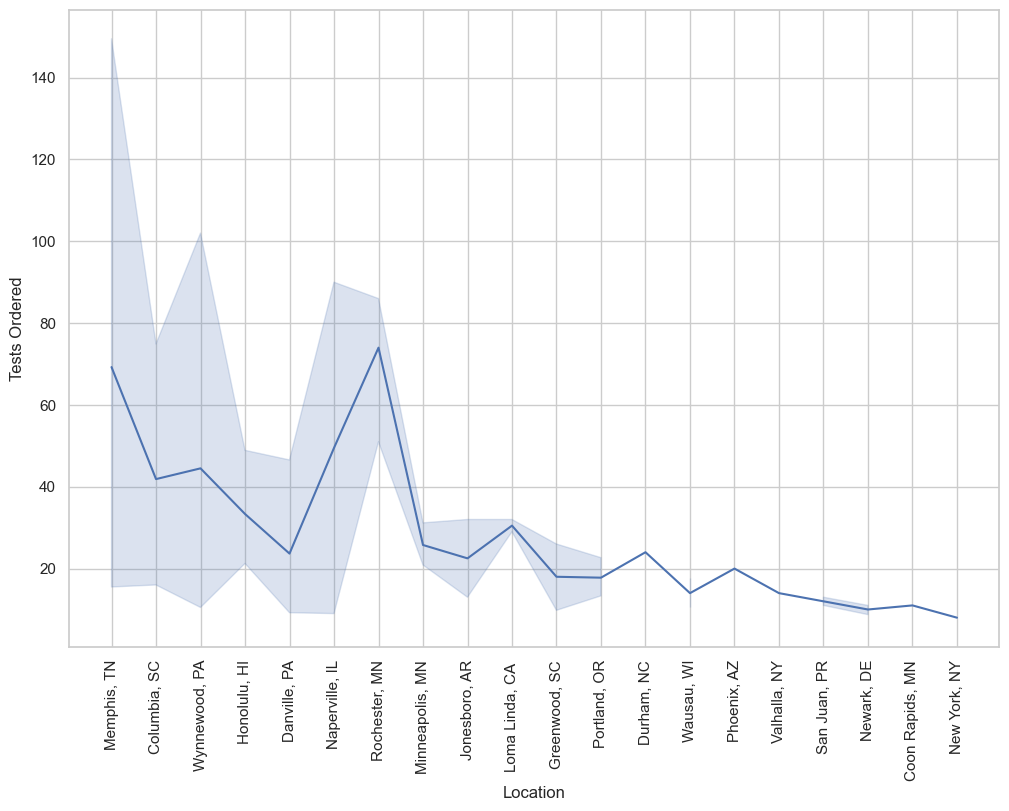

In [119]:
sns.lineplot(x='Location', y='Tests Ordered', data=Ordering_Physicians)
plt.xticks(rotation=90)


### merging prescription_data with Ordering_Physicians

In [126]:
Ordering_Physicians.head()

,Last Name,First Name,Tests Ordered,NPI,Facility,Location,Specialty
0,Yaranov,Dmitry,194,1255607164,Baptist Memorial,"Memphis, TN",Cardiology
1,Traufler,Robin,140,1669474490,Prisma Health Richland,"Columbia, SC",PAC
2,Droogan,Christopher,131,1174528129,Lankenau,"Wynnewood, PA",Cardiology
3,Sheikh,Fariha,116,1912225137,Queen's Medical Center,"Honolulu, HI",Surgery
4,Carry,Brendan,113,1376836395,Geisinger,"Danville, PA",Cardiology


In [43]:
prescription_data.rename(columns={"Prscrbr_NPI": "NPI"},inplace = True)

In [66]:
merged_data = pd.merge(prescription_data, Ordering_Physicians, on='NPI', how='left')
# merged_data2 = pd.merge(prescription_data, Ordering_Physicians, on='NPI', how='right')


In [57]:
merged_data1['NPI'].unique()

array([1467457358, 1174528129, 1255587465, 1104011592, 1598729253,
       1053523613, 1639131345, 1376836395, 1629090196, 1720138100,
       1659386266, 1730317314, 1750554986, 1912986183, 1467816736,
       1669474490, 1861989030, 1013262419, 1881234631, 1063862381,
       1255607164, 1902214471, 1366875486, 1497950570, 1013379841,
       1093234866, 1164419644, 1356342034, 1427544873, 1437252012,
       1467865279, 1477199354, 1528372380, 1568658201, 1689675332,
       1720460298, 1831484138, 1891738944, 1922200922, 1932159357,
       1962536946, 1013984012, 1053492215, 1093958803, 1205814464,
       1245235712, 1346232980, 1659630366, 1699903526, 1851324446,
       1871068841, 1043279326, 1215917646, 1225005176, 1235573247,
       1265055073, 1326148040, 1457906042, 1487850780, 1689916157,
       1700853603, 1750395232, 1831753557, 1851323745, 1962461442,
       1457301657, 1477905909, 1487138756, 1881854636, 1952550782],
      dtype=int64)

In [58]:
merged_data2['NPI'].unique()

array([1255607164, 1669474490, 1174528129, 1912225137, 1376836395,
       1144305632, 1063449833, 1912986183, 1881234631, 1518975374,
       1730676347, 1639131345, 1184967150, 1861989030, 1063862381,
       1215355680, 1972965408, 1720138100, 1629090196, 1467457358,
       1801893979, 1497950570, 1366875486, 1750554986, 1104011592,
       1255587465, 1053523613, 1710006317, 1942711478, 1801165337,
       1730317314, 1598729253, 1467816736, 1902214471, 1396791174,
       1265696116, 1659386266, 1093234866, 1013262419, 1265679765,
       1831484138, 1720460298, 1568658201, 1962536946, 1356342034,
       1164419644, 1013379841, 1932159357, 1457662868, 1689675332,
       1437252012, 1427544873, 1891738944, 1235174236, 1528372380,
       1467865279, 1922200922, 1477199354, 1093958803, 1053492215,
       1851324446, 1871068841, 1205211919, 1003287822, 1578846978,
       1336670819, 1275616765, 1013984012, 1205814464, 1346232980,
       1831409804, 1174563597, 1003470030, 1326384819, 1851323

In [63]:
list22= [x for x in merged_data1['NPI'].unique() if  x not in merged_data2['NPI'].unique()]

In [64]:
list22

[]

In [83]:
top_generic_drugs

,Prscrbr_State_FIPS,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Tot_Benes,Tests Ordered
NPI,,,,,,,,,,,,
1013262419,222,128,220.0,6600,28266.65,25.0,31.0,65.5,173.10,1965.0,0.0,144
1013379841,6,12,24.0,720,195.22,0.0,12.0,24.0,195.22,720.0,0.0,21
1053523613,972,2077,4938.6,147151,529787.78,577.0,989.0,2492.2,410073.11,74353.0,0.0,1044
1063862381,81,69,155.0,4599,1309.88,0.0,69.0,155.0,1309.88,4599.0,0.0,153
1093234866,1395,1819,3220.2,93589,335596.17,664.0,1130.0,1927.6,209720.81,55894.0,370.0,744
1104011592,1890,4253,7868.4,227381,410249.26,1468.0,3240.0,6061.4,337811.34,175368.0,530.0,1260
1164419644,729,1219,2669.8,78272,158377.36,482.0,645.0,1409.6,104868.39,41422.0,47.0,567
1174528129,2016,4707,11574.4,345840,503984.49,1257.0,2913.0,7479.9,159212.88,223530.0,249.0,6288
1255587465,1800,3151,7338.3,218829,484685.07,902.0,1837.0,4316.8,341224.30,129027.0,184.0,1160


In [87]:
#filtering the physicians who order a high number of blood tests above certain this threshold
high_test_physicians = Ordering_Physicians[Ordering_Physicians['Tests Ordered'] > Ordering_Physicians['Tests Ordered'].quantile(0.50)]
# Get the top 10 generic drugs most commonly prescribed by the high test physicians
top_generic_drugs = merged_data[merged_data['NPI'].isin(high_test_physicians['NPI'])]
top_generic_drugs = top_generic_drugs.groupby('NPI')['Gnrc_Name', 'Tests Ordered'].sum()

In [88]:
top_generic_drugs

NPI
1013262419    SpironolactoneMetoprolol SuccinateCarvedilolEm...
1013379841                                  Pantoprazole Sodium
1053523613    CarvedilolSpironolactoneAtorvastatin CalciumMe...
1063862381    LisinoprilMetoprolol SuccinateMetoprolol Tartrate
1093234866    AllopurinolAmiodarone HclAmlodipine BesylateAt...
1104011592    FurosemideMetoprolol SuccinatePotassium Chlori...
1164419644    Amiodarone HclAmlodipine BesylateAtorvastatin ...
1174528129    Atorvastatin CalciumMetoprolol SuccinateCarved...
1255587465    Metoprolol SuccinateApixabanFurosemideMetoprol...
1255607164    SpironolactoneFurosemidePotassium ChlorideTors...
1356342034    CarvedilolSpironolactoneAtorvastatin CalciumMe...
1366875486    SpironolactoneTorsemidePotassium ChlorideWarfa...
1376836395    Metoprolol SuccinateAtorvastatin CalciumTorsem...
1467457358    Atorvastatin CalciumEzetimibeClopidogrel Bisul...
1467816736    Metoprolol SuccinateCarvedilolAtorvastatin Cal...
1497950570                          

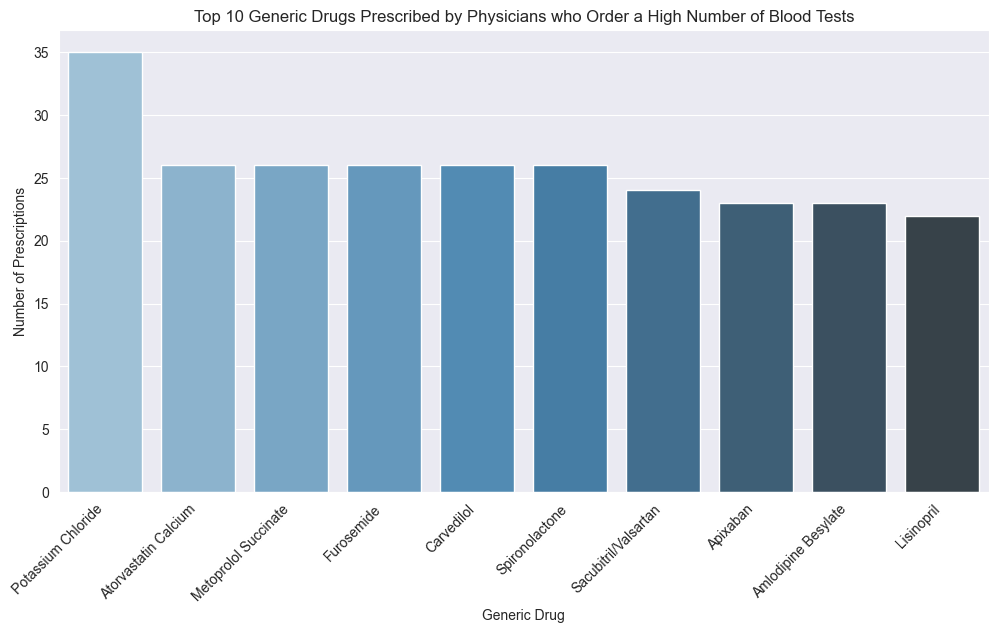

In [84]:
#filtering the physicians who order a high number of blood tests above certain this threshold
high_test_physicians = Ordering_Physicians[Ordering_Physicians['Tests Ordered'] > Ordering_Physicians['Tests Ordered'].quantile(0.50)]
# Get the top 10 generic drugs most commonly prescribed by the high test physicians
top_generic_drugs = merged_data[merged_data['NPI'].isin(high_test_physicians['NPI'])]['Gnrc_Name'].value_counts().head(10)

# Create a bar plot to visualize the top 10 generic drugs
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.barplot(x=top_generic_drugs.index, y=top_generic_drugs.values, palette="Blues_d")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Generic Drug')
plt.ylabel('Number of Prescriptions')
plt.title('Top 10 Generic Drugs Prescribed by Physicians who Order a High Number of Blood Tests')
plt.show()

In [73]:
top_generic_drugs

Potassium Chloride      35
Atorvastatin Calcium    26
Metoprolol Succinate    26
Furosemide              26
Carvedilol              26
Spironolactone          26
Sacubitril/Valsartan    24
Apixaban                23
Amlodipine Besylate     23
Lisinopril              22
Name: Gnrc_Name, dtype: int64

Text(0.5, 1.0, 'Relationship between Generic Drug, Total Claim Count, and Tests Ordered')

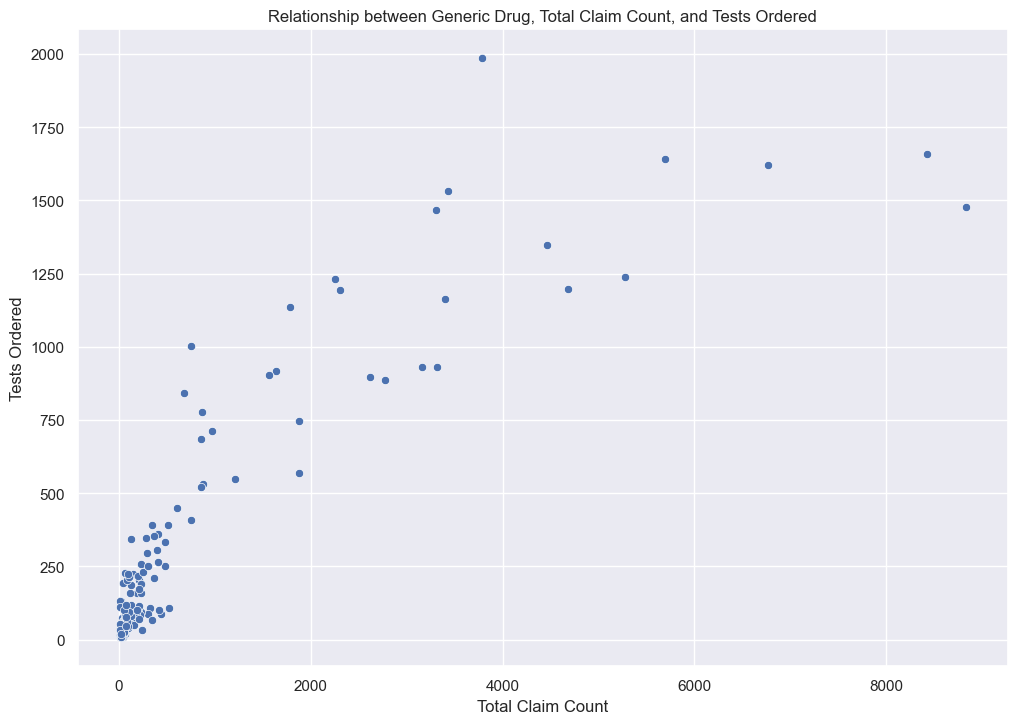

In [138]:
# group the merged data by generic drug and calculate the total claim count and tests ordered
drug_counts = merged_data.groupby('Gnrc_Name')['Tot_Clms', 'Tests Ordered'].sum()

# create scatter plot
sns.scatterplot(x='Tot_Clms', y='Tests Ordered', data=drug_counts)

# set axis labels and title
plt.xlabel('Total Claim Count')
plt.ylabel('Tests Ordered')
plt.title('Relationship between Generic Drug, Total Claim Count, and Tests Ordered')


In [139]:
drug_counts

,Tot_Clms,Tests Ordered
Gnrc_Name,,
Abemaciclib,23,9
Abiraterone Acetate,55,26
Acalabrutinib,13,14
Acyclovir,437,87
Albuterol Sulfate,11,13
...,...,...
Varenicline Tartrate,11,32
Venetoclax,68,48
Verapamil Hcl,69,78


In [131]:
merged_data.columns

Index(['NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name', 'Prscrbr_City',
       'Prscrbr_State_Abrvtn', 'Prscrbr_State_FIPS', 'Prscrbr_Type',
       'Prscrbr_Type_Src', 'Brnd_Name', 'Gnrc_Name', 'Tot_Clms',
       'Tot_30day_Fills', 'Tot_Day_Suply', 'Tot_Drug_Cst', 'Tot_Benes',
       'GE65_Sprsn_Flag', 'GE65_Tot_Clms', 'GE65_Tot_30day_Fills',
       'GE65_Tot_Drug_Cst', 'GE65_Tot_Day_Suply', 'GE65_Bene_Sprsn_Flag',
       'GE65_Tot_Benes', 'Last Name', 'First Name', 'Tests Ordered',
       'Facility', 'Location', 'Specialty '],
      dtype='object')

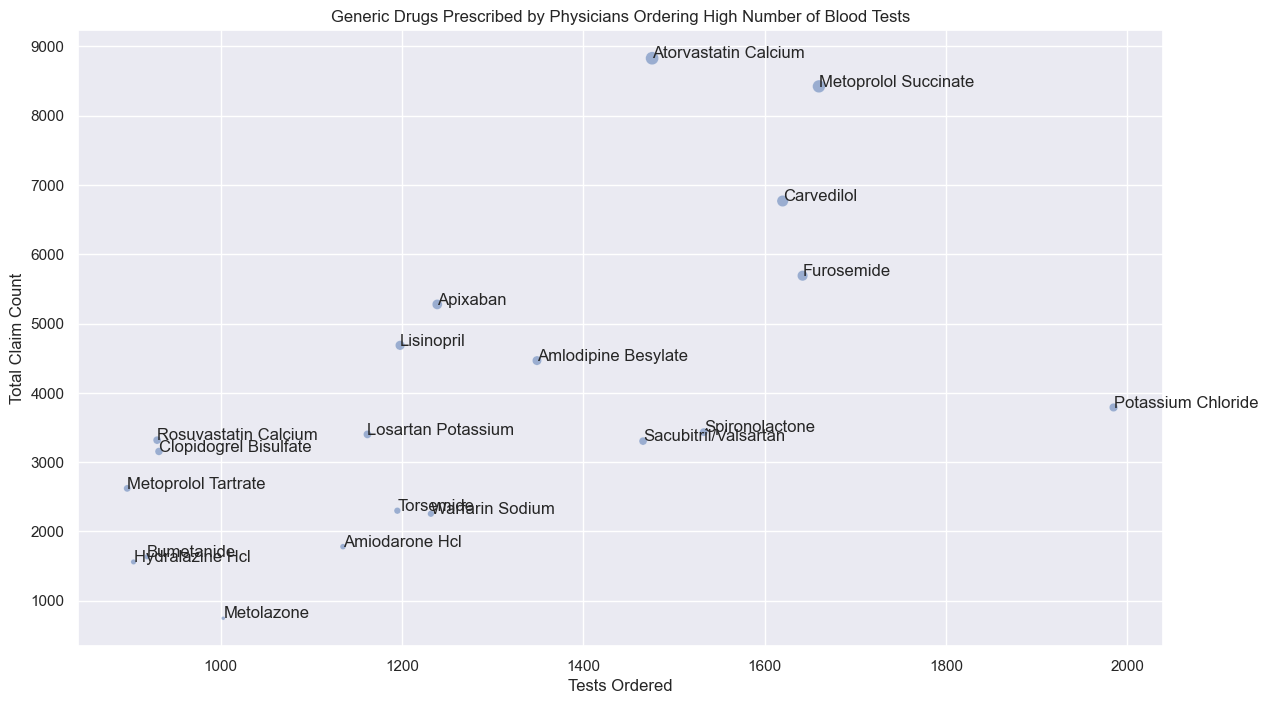

In [171]:
# Group by generic_name and calculate the sum of Tests Ordered and Total Claim Count
grouped_data = merged_data.groupby('Gnrc_Name').agg({'Tests Ordered': 'sum', 'Tot_Clms': 'sum'}).sort_values(by='Tests Ordered', ascending=False).head(20)

plt.figure(figsize=(14,8))# Set the chart title and labels
# Create a scatter plot
sns.scatterplot(x=grouped_data['Tests Ordered'], y=grouped_data['Tot_Clms'], s=grouped_data['Tot_Clms']/100, alpha=0.5)

# Set the axis labels and title
plt.xlabel('Tests Ordered')
plt.ylabel('Total Claim Count')
plt.title('Generic Drugs Prescribed by Physicians Ordering High Number of Blood Tests')

# Add the generic drug name as text labels
for i, txt in enumerate(grouped_data.index):
    plt.annotate(txt, (grouped_data['Tests Ordered'][i], grouped_data['Tot_Clms'][i]))

# Show the plot
plt.show()

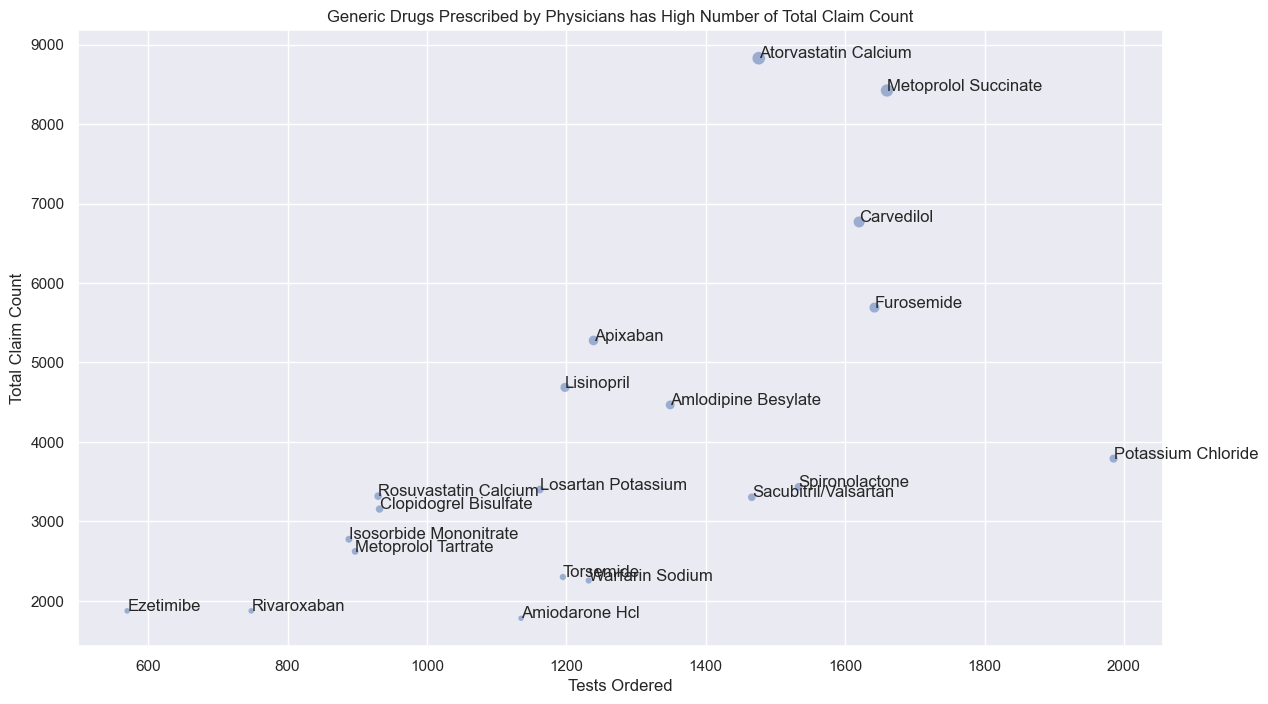

In [172]:
# Group by generic_name and calculate the sum of Tests Ordered and Total Claim Count
grouped_data = merged_data.groupby('Gnrc_Name').agg({'Tests Ordered': 'sum', 'Tot_Clms': 'sum'}).sort_values(by='Tot_Clms', ascending=False).head(20)

plt.figure(figsize=(14,8))# Set the chart title and labels
# Create a scatter plot
sns.scatterplot(x=grouped_data['Tests Ordered'], y=grouped_data['Tot_Clms'], s=grouped_data['Tot_Clms']/100, alpha=0.5)

# Set the axis labels and title
plt.xlabel('Tests Ordered')
plt.ylabel('Total Claim Count')
plt.title('Generic Drugs Prescribed by Physicians has High Number of Total Claim Count')

# Add the generic drug name as text labels
for i, txt in enumerate(grouped_data.index):
    plt.annotate(txt, (grouped_data['Tests Ordered'][i], grouped_data['Tot_Clms'][i]))

# Show the plot
plt.show()